# Latent Manifold and Regression

This example explains Multiple Linear Regression with Python 3, pandas and scikit-learn on Jupyter Notebook. We selected fake news data set. This dataset is not for regression problem so we are doing some more models to get good story.

## Requirements
To use this example you need Python 3 and latest versions of pandas and scikit-learn. I used Anaconda distribution to install.

### Data Set: 
1.	Kaggle fake news dataset: https://www.kaggle.com/snapcrack/all-the-news
2.	Real News Dataset https://webhose.io/datasets/
3.	Domain Ranking: https://www.rankstore.com/bulk-alexa-rank-checker/#

### Data Prep and enrichment: 
1.	Fixed format of file and data types
2.	Filled several missing values for columns
3.	Data Enrichment: Downloaded real news data from webhose and massaged it. Wrote a program to aline format and merge file(File: Webhose_RealNews_DataPull.py). Then added this dimention after transposing to dataset. (enrichment)
4.	Domain ranking is the latent manifold.


### ML life-cycle:
1.	Business objective connected to it.
2.	Data set, data enrichment, wrangle and prepare it.
3.	Find a latent manifold
4.	What the data is saying

## Algorithm
1.	Multiple Linear Regression.

In [1]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
#df = pd.read_csv('RealNewsData1.tsv', delimiter='\t', quoting=3)#3 - ignores ""
df = pd.read_csv('fake_real_dataset.csv')
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 4].values

print(df.shape)
df.describe()

(3711, 20)


,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,3711.000000,3.711000e+03,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000
mean,1.669631,3.265969e+05,0.044921,2.291296,2.106710,24.406090,0.252493,24.398814
std,10.162467,1.209855e+06,0.160145,15.017726,9.617506,113.799844,5.814621,113.797344
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.890000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.576100e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,8.194000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,7.310981e+06,1.000000,500.000000,296.000000,999.000000,319.000000,999.000000


In [3]:
df.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')

In [4]:
# selecting Latent column
dft = df.loc[:, ['domain_rank', 'shares', 'type']]
print(dft.shape)
X = dft.iloc[:, :-2].values
y = dft.iloc[:, 1].values
print(X)

(3711, 3)
[[88465]
 [88465]
 [88465]
 ...
 [  283]
 [  943]
 [   13]]


In [5]:
# LabelEncoder - Encoding categorical data to number, OneHotEncoder - row to column 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
#onehotencoder = OneHotEncoder(categorical_features = [0])
#y = onehotencoder.fit_transform(y).toarray()
print(y)

[0 0 0 ... 3 6 0]


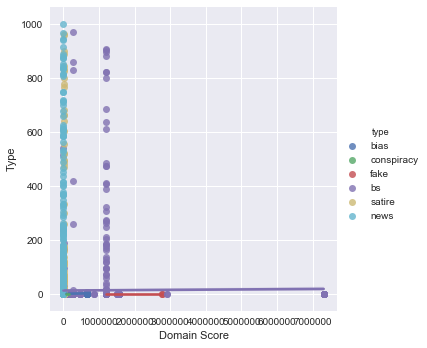

In [6]:

import seaborn as sns
sns.set()

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="domain_rank", y="shares", hue="type",
               truncate=True, data=dft)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Domain Score", "Type")


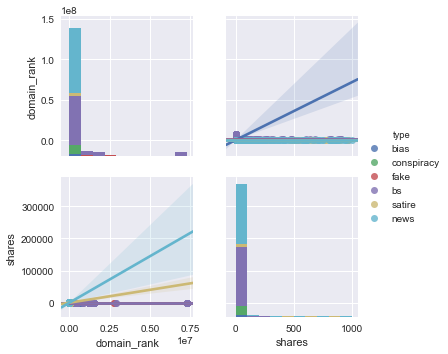

In [7]:
#Pairplot
g = sns.pairplot(dft, kind="reg", hue="type")

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[10.37520839 10.46378779  9.00143526 10.48658577 10.47235336 10.48709963
 10.48732822 10.48675193 10.48726291 10.45974417 10.48658577 10.3407156
 10.41594623 10.4874867  10.48721969 10.48726291 10.43313788 10.37520839
 10.48709963 10.4874867  10.48658577 10.46387904 10.48709963 10.24990596
 10.40154862 10.4874867  10.48674905 10.4874867  10.48709963 10.45974417
 10.46562327 10.48721777 10.4874867  10.48714957 10.40878969 10.48658577
 10.48658577 10.48721777  9.00143526 10.46378779 10.41594623 10.48718127
 10.41594623  9.00143526 10.25287384 10.24990596  3.46543297 10.4874867
 10.48709963 10.25287384 10.23104691  9.34351922 10.41594623 10.48721393
  9.34351922 10.4873215  10.4871198  10.42070638 10.45974417  9.00143526
 10.48718415 10.24990596 10.46378779 10.45974417 10.43313788 10.48709963
  9.34351922 10.42070638 10.23104691 10.40154862 10.23104691 10.48719087
 10.48690657 10.41594623 10.41594623 10.48747902 10.48658577 10.4874867
 10.46562327 10.42070638 10.37520839 10.24990596 10.42

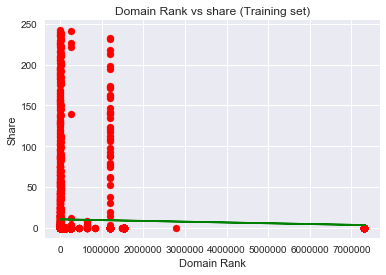

In [14]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Domain Rank vs share (Training set)')
plt.xlabel('Domain Rank')
plt.ylabel('Share')
plt.show()

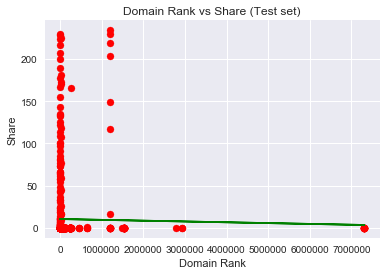

In [16]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('Domain Rank vs Share (Test set)')
plt.xlabel('Domain Rank')
plt.ylabel('Share')
plt.show()

# Story 
As domain ranking grows people becomes less likely to share. Ideally, there is not regression.